# Evaporation, Penman Monteith

**Dr Ting Sun** (ting.sun@reading.ac.uk)

11 Oct 2018

## Measuring Humidity Fluxes

### (open-path) Infra-Red Gas Analyzer (IRGA)

![Gas analyser (Burba 2013)](../figures/gas-analyser.png)

#### How it works?

IDGA measures CO2 and water vapor densities in air based on non-dispersive infrared spectroscopy:

* Infrared radiation is transmitted first through temperature-controlled optical filters and then an open sample path to a thermally regulated detector
* Some of the infrared radiation is absorbed by CO2 and water vapor in the sample path
* Gas densities are computed from the ratio of absorbed radiation to a reference.

* Wavelength at which different atmospheric gases absorb infrared radiation

content|wave length
---|---
Water Vapour |2.59 µm and 2.40 µm
Carbon Dioxide| 4.26 µm and 3.95 µm

### Lysimeters: 

* Small  

![A small lysimeter(source:???)](../figures/lysimeter-small.png)

* Large soil block: lifted onto weighing scale crops!

![Installation of an in situ lysimeter](../figures/lysimeter-large1.png)

![Operation over an in situ lysimeter](../figures/lysimeter-large2.png)
    

## Moisture Flux, Evaporation and Latent Heat

symbol | meaning | unit
--- | --- | ---
$\overline{q}$ | Specific Humidity | $\mathrm{kg \ {kg}^{-1}}$
$\overline{w'q'}$|Moisture Flux| $\mathrm{kg \ {kg}^{-1}\ {m}^{-2}\ {m}^{-1}}$
$Q_E$ or $\lambda E$|Latent heat of vaporization|$\mathrm{J \ {kg}^{-1}}$
$E$| Evaporation|$\mathrm{mm \ {d}^{-1}}$

### approximations


water equivalent| energy equivalent
--- | --- 
$\mathrm{mm \ {d}^{-1}}$ |$\mathrm{28.3\ W \ {m}^{-2}}$
$\mathrm{mm \ {h}^{-1}}$ |$\mathrm{680\ W \ {m}^{-2}}$


**Note**:

* these approximations are valid at $20\ \mathrm{°C}$
* they change with $L_v$, $\rho_w$


## How to model evaporation with measurements at only one height?

![How to model evaporation with meansurements at one height?](../figures/PM-assumption.png)

### Modified Penman-Monteith equation:

$$Q_E=\frac{s(Q^*-Q_G)+c_p\rho{V}/r_a}{s+\gamma(1+r_s/r_a)}$$

where 

symbol|meaning|unit
--|--|--
$s$|slope of the saturation vapour pressure vs. temperature curve |$\mathrm{Pa}\mathrm{°C}^{-1}$
$c_p$ |heat capacity of air |$\mathrm{J} \ \mathrm{m^{-3}} \ \mathrm{°C^{-1}}$
$\gamma$ 	|psychometric constant |$\mathrm{Pa} \ \mathrm{°C}^{-1}$
$V$|vapour pressure deficit of air |$\mathrm{Pa}$
$r_a$ 	|aerodynamic resistance | $\mathrm{s \ m^{-1}}$
$r_s$ 	|surface resistance |$\mathrm{s \ m^{-1}}$

## Wind’s Influence on Evaporation  (from earlier class)

![Resistance](../figures/PM-equation.png)



### Stomatal and Soil Resistance

![Canopy resistance (source??)](../figures/resistance-plant.png)

#### Stomata - regulate water loss

![Plant stomata (source: Getty Images)](../figures/stomata.jpg)


#### Canopy resistance depends on:  
* Plant type
   
   - Plant Roots: extend to where there is water
   ![Plant roots (source??)](../figures/plant-root.png)

* Temperature
* Soil Moisture
* Radiation


### Use of Resistances

$$\overline{w'\chi'}=\frac{\chi(z_2)-\chi(z_1)}{\gamma_\chi}$$


Electrical Analogy|Resistance network for a surface scheme
:-------------------------:|:-------------------------:
<img src="../figures/electrical-analogy.png" width="100%">|<img src="../figures/resistance-network.png" width="100%">

## The Combination Equation

- sensible heat flux
$$Q_H=\rho c_p \frac{T-T_0}{r_h}$$

- latent heat flux
$$Q_E=\frac{L_v}{R_v T} \frac{e-e_0}{r_v}=\frac{\rho c_p}{\gamma_*}\frac{e-e_0}{r_h}$$

- Linearize saturated vapour pressure
$$e_0=e_s(T_0)=e_s(T)-s(T-T_0)$$

where $s=\frac{d e_s}{dT}$

## Derivation of Penman Equation

### Goal: To obtain an expression of $Q_E$ as a function of 
* available energy

$$Q_a=Q^*-Q_G=Q_H+Q_E$$

  bear in mind the surface energy balance $Q^*-Q_G=Q_H+Q_E$ by neglecting: 1) advection heat $Q_{\text{adv}}$; and 2) anthropogenic heat: $Q_F$.
    
* surface level meteorological factors:
    - air temperature $T$
    - air humidity in vapour pressure $e(T)$

### Derivation using `sympy`

In [1]:
from sympy import *
init_printing()

In [2]:
qh,qe,qn,qg=symbols('Q_H,Q_E,Q^*,Q_G')
t,t0,et,e0,e,s=symbols('T,T_0,e_T,e_0,e,s')
rho,gms,cp,rh,rv=symbols(r'\rho,\gamma_*,c_p,r_h,r_v')

In [3]:
sol=solve([
    qn-qg-qh-qe,
    qe-(rho*cp/gms)*((e-e0)/rh),
    qh-(rho*cp*(t-t0)/rh),
    e0-et-s*(t-t0)
],
    [qe,qh,e0,t0])
sol_qe=sol.get(qe)

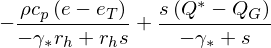

In [4]:
qa,de=symbols('Q_a,de')
apart(sol_qe.subs({qn:qa+qg,e:et+de}),qa).subs({qa:qn-qg,de:e-et})

## Penman (1948) Equation

* Penman equation:
$$Q_E=L_VE=\frac{s \left(Q^{*} - Q_{G}\right)}{- \gamma_* + s}- \frac{\rho c_{p} \left(e - e_{T}\right)}{- \gamma_* r_{h} + r_{h} s}$$

* Advantage:
    - estimation of evaporation from simple measurements
    - Using measurements at low heights: can neglect stability dependence of resistance
    - Approximate resistance for heat transfer by the aerodynamic resistance

* Remaing Challenge:
    - How to determine $\gamma_*=\gamma \frac{r_v}{r_h}$?


## Surface Transfers as Electrical Circuits

* Total resistance for vapour:
$${r_v}={r_s}+{r_h}$$

resistance network|real-world canopy
:-------------------------:|:-------------------------:
<img src="../figures/resistance-surface.png" width="100%">|<img src="../figures/canopy-real.png" width="100%">


## Exercises

1. Manual derivation of Penman (1948) equation.


2. The Penman Monteith equation provides one method to calculate the components of the surface energy balance. It assumes energy balance closure at each model time step (see the notes posted before last lecture). Evaluate the performance of the PM calculations using the EC data (e.g. $Q_H$ and $Q_E$, $\beta$).


3. Calculate the canopy resistance from the EC and other data (this can be back-calculated). How do these values compare to the literature/textbooks?

    **note**: *You will need dry conditions (e.g. 12 h since rain – depending on time of day) and solar radiation for the calculations (e.g. $Q^* \gt \mathrm{20\ W \ {m}^{-2}}$)*